### Section 1
The task is to observe quantitavly the change of gas prices before and after COVID-19. The coronovirus was a very serious time and has had many economic effects. 

### Section 2

I currently pay for gas for my car, so I know that gas prices have increased, but was this due to COVID? The goal is to see whether gas increased due to covid or were there other factors that could have played into that role. Examining the gas prices before COVID gives us a view of how much cheaper or more expensive gas was before COVID and whether there were changes in gas prices that could be similar or different to the change in gas prices after COVID to examine whether COVID played a major role in gas prices. 

### Section 3

Using the github link, I was able to download the csv and get all the data from 1990. I was able to retrieve it using the code below

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-01/weekly_gas_prices.csv"
df = pd.read_csv(url)

print(df.head())
print(df.columns)
print(df.shape)

         date      fuel    grade   formulation  price
0  1990-08-20  gasoline  regular           all  1.191
1  1990-08-20  gasoline  regular  conventional  1.191
2  1990-08-27  gasoline  regular           all  1.245
3  1990-08-27  gasoline  regular  conventional  1.245
4  1990-09-03  gasoline  regular           all  1.242
Index(['date', 'fuel', 'grade', 'formulation', 'price'], dtype='object')
(22360, 5)


### Section 4
Looking at the results from the above code. There are 4 variables with one being numerical, and there are 22360 rows. The rows are not necessarily different weeks but different locations as well. 

### Section 6

The code and graphs are down below:

/var/folders/tk/1nk8jnjd7mvbd28c938n3_dr0000gn/T/ipykernel_39549/2336563549.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid["rolling_price"] = pre_covid["price"].rolling(12).mean()
/var/folders/tk/1nk8jnjd7mvbd28c938n3_dr0000gn/T/ipykernel_39549/2336563549.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid["rolling_price"] = post_covid["price"].rolling(12).mean()


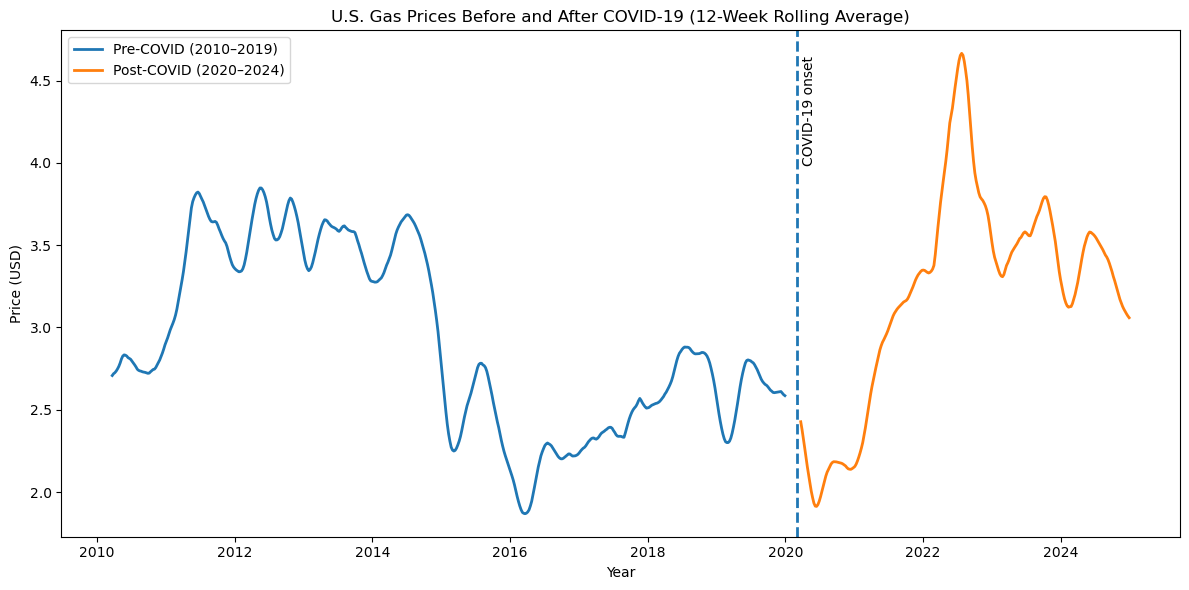

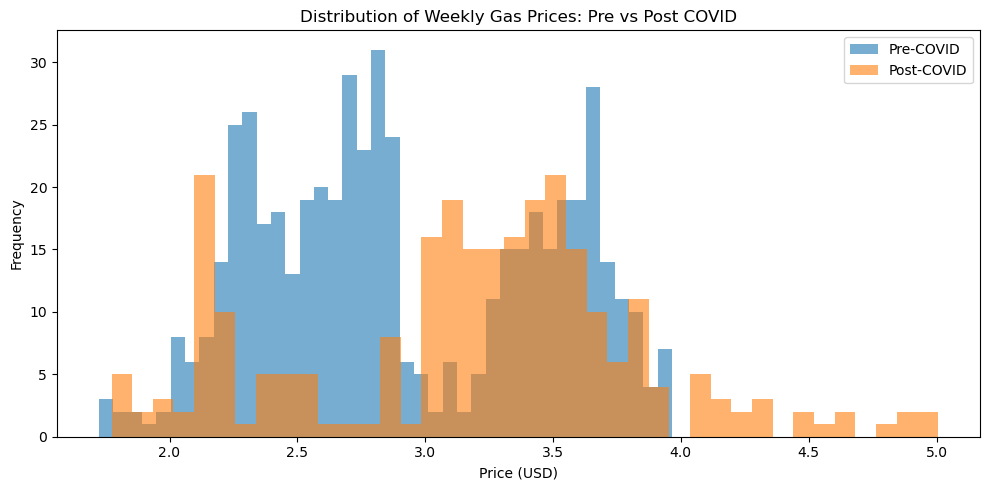

,Pre-COVID,Post-COVID
count,522.000000,261.000000
mean,2.910305,3.190238
std,0.554728,0.670764
min,1.724000,1.773000
25%,2.450250,2.855000
50%,2.806500,3.281000
75%,3.451250,3.576000
max,3.965000,5.006000


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df["date"] = pd.to_datetime(df["date"])

df = df[
    (df["fuel"] == "gasoline") &
    (df["grade"] == "regular") &
    (df["formulation"] == "all")
]

pre_covid = df[(df["date"] >= "2010-01-01") & (df["date"] <= "2019-12-31")]
post_covid = df[(df["date"] >= "2020-01-01") & (df["date"] <= "2024-12-31")]

pre_covid["rolling_price"] = pre_covid["price"].rolling(12).mean()
post_covid["rolling_price"] = post_covid["price"].rolling(12).mean()


plt.figure(figsize=(12,6))

plt.plot(pre_covid["date"], pre_covid["rolling_price"], label="Pre-COVID (2010–2019)", linewidth=2)
plt.plot(post_covid["date"], post_covid["rolling_price"], label="Post-COVID (2020–2024)", linewidth=2)


plt.axvline(pd.to_datetime("2020-03-01"), linestyle="--", linewidth=2)
plt.text(pd.to_datetime("2020-04-01"), 4, "COVID-19 onset", rotation=90)

plt.title("U.S. Gas Prices Before and After COVID-19 (12-Week Rolling Average)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))

plt.hist(pre_covid["price"], bins=40, alpha=0.6, label="Pre-COVID")
plt.hist(post_covid["price"], bins=40, alpha=0.6, label="Post-COVID")

plt.title("Distribution of Weekly Gas Prices: Pre vs Post COVID")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

summary = pd.DataFrame({
    "Pre-COVID": pre_covid["price"].describe(),
    "Post-COVID": post_covid["price"].describe()
})

summary

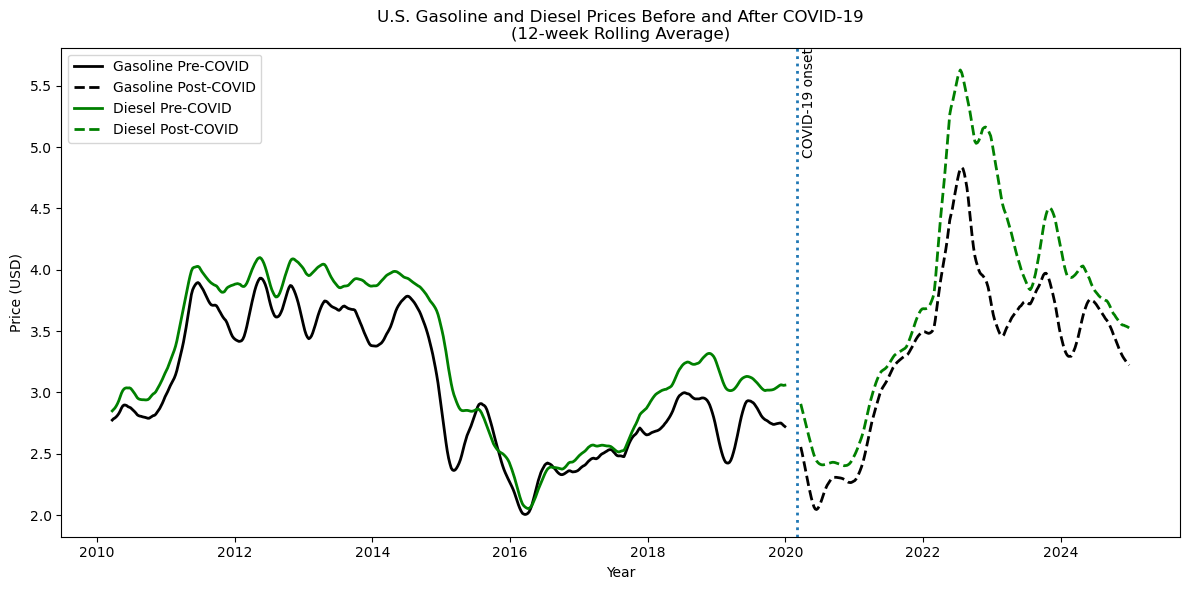

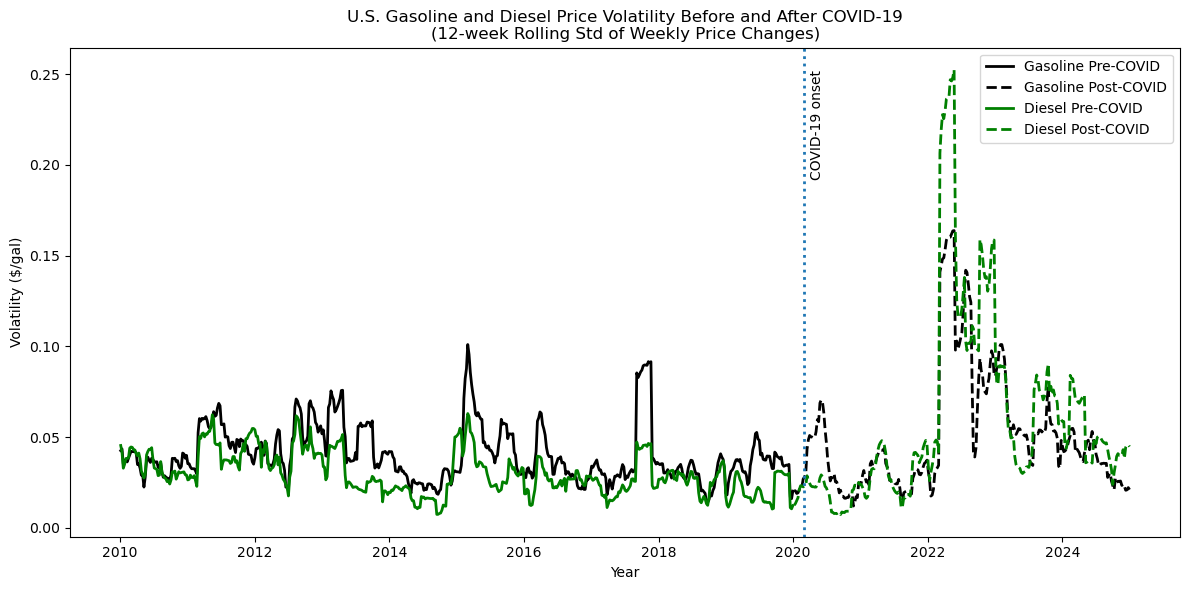

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# Prep
# -------------------------
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# -------------------------
# GASOLINE (grade == "all")
# -------------------------
gas = df[
    (df["fuel"] == "gasoline") &
    (df["grade"] == "all")
].copy()

gas_weekly = (
    gas.groupby("date", as_index=False)["price"]
    .mean()
)

# -------------------------
# DIESEL (average sulfur grades)
# -------------------------
diesel = df[
    (df["fuel"] == "diesel") &
    (df["grade"].isin(["low_sulfur", "ultra_low_sulfur"]))
].copy()

diesel_weekly = (
    diesel.groupby("date", as_index=False)["price"]
    .mean()
)

# -------------------------
# Pre / Post COVID splits
# -------------------------
def split_and_roll(data):
    pre = data[(data["date"] >= "2010-01-01") & (data["date"] <= "2019-12-31")].copy()
    post = data[(data["date"] >= "2020-01-01") & (data["date"] <= "2024-12-31")].copy()
    pre["roll_12w"] = pre["price"].rolling(12).mean()
    post["roll_12w"] = post["price"].rolling(12).mean()
    return pre, post

gas_pre, gas_post = split_and_roll(gas_weekly)
diesel_pre, diesel_post = split_and_roll(diesel_weekly)

# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(12,6))

# Gasoline (BLACK)
plt.plot(gas_pre["date"], gas_pre["roll_12w"],
         color="black", linewidth=2, label="Gasoline Pre-COVID")
plt.plot(gas_post["date"], gas_post["roll_12w"],
         color="black", linewidth=2, linestyle="--", label="Gasoline Post-COVID")

# Diesel (GREEN)
plt.plot(diesel_pre["date"], diesel_pre["roll_12w"],
         color="green", linewidth=2, label="Diesel Pre-COVID")
plt.plot(diesel_post["date"], diesel_post["roll_12w"],
         color="green", linewidth=2, linestyle="--", label="Diesel Post-COVID")

# COVID marker
plt.axvline(pd.to_datetime("2020-03-01"), linestyle=":", linewidth=2)
plt.text(pd.to_datetime("2020-04-01"),
         max(gas_weekly["price"].max(), diesel_weekly["price"].max()),
         "COVID-19 onset", rotation=90, va="top")

plt.title("U.S. Gasoline and Diesel Prices Before and After COVID-19\n(12-week Rolling Average)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

diesel_weekly = (
    df[(df["fuel"] == "diesel") & (df["grade"].isin(["low_sulfur", "ultra_low_sulfur"]))]
    .groupby("date", as_index=False)["price"]
    .mean()
    .sort_values("date")
)

# -------------------------
# Function: compute rolling volatility + split pre/post
# -------------------------
def add_vol_and_split(data):
    data = data.copy().sort_values("date")
    data["price_change"] = data["price"].diff()
    data["vol_12w"] = data["price_change"].rolling(12).std()

    pre = data[(data["date"] >= "2010-01-01") & (data["date"] <= "2019-12-31")].copy()
    post = data[(data["date"] >= "2020-01-01") & (data["date"] <= "2024-12-31")].copy()
    return pre, post

gas_pre_v, gas_post_v = add_vol_and_split(gas_weekly)
diesel_pre_v, diesel_post_v = add_vol_and_split(diesel_weekly)

# -------------------------
# Plot volatility (same styling as your price plot)
# -------------------------
plt.figure(figsize=(12,6))

# Gasoline volatility (BLACK)
plt.plot(gas_pre_v["date"], gas_pre_v["vol_12w"],
         color="black", linewidth=2, label="Gasoline Pre-COVID")
plt.plot(gas_post_v["date"], gas_post_v["vol_12w"],
         color="black", linewidth=2, linestyle="--", label="Gasoline Post-COVID")

# Diesel volatility (GREEN)
plt.plot(diesel_pre_v["date"], diesel_pre_v["vol_12w"],
         color="green", linewidth=2, label="Diesel Pre-COVID")
plt.plot(diesel_post_v["date"], diesel_post_v["vol_12w"],
         color="green", linewidth=2, linestyle="--", label="Diesel Post-COVID")

# COVID marker
plt.axvline(pd.to_datetime("2020-03-01"), linestyle=":", linewidth=2)
plt.text(pd.to_datetime("2020-04-01"),
         max(gas_weekly["price"].diff().rolling(12).std().max(),
             diesel_weekly["price"].diff().rolling(12).std().max()),
         "COVID-19 onset", rotation=90, va="top")

plt.title("U.S. Gasoline and Diesel Price Volatility Before and After COVID-19\n(12-week Rolling Std of Weekly Price Changes)")
plt.xlabel("Year")
plt.ylabel("Volatility ($/gal)")
plt.legend()
plt.tight_layout()
plt.show()

### Description

The first plot compares smoothed weekly U.S. gas prices before and after the onset of COVID-19 using a 12-week rolling average. Notably, gas prices experienced several pronounced increases prior to 2020, particularly between 2011–2014, indicating that large price spikes are not unique to the COVID-19 period. This suggests that COVID-19 is not the sole driver of elevated gasoline prices and that pre-existing market forces, such as oil supply constraints and global economic conditions, also played a significant role in historical price volatility. However, following the onset of COVID-19 in early 2020, prices initially dropped sharply, reflecting reduced travel demand and economic slowdown, before rising rapidly to unprecedented levels by 2022. This post-COVID surge appears both steeper and higher than most pre-COVID fluctuations.

The second plot compares the distributions of weekly gas prices before and after COVID-19 and provides insight into changes in variability and typical price levels. Pre-COVID prices are more tightly clustered around their mean, indicating relatively stable pricing with fewer extreme values. In contrast, post-COVID prices exhibit a wider distribution with a heavier right tail, reflecting increased volatility and more frequent high-price episodes. This shift is further supported by the higher post-COVID mean and standard deviation, suggesting that gas prices have not only increased on average but have also become more unpredictable. Together, these results indicate that while price spikes existed before COVID-19, the post-COVID period is characterized by both elevated price levels and greater uncertainty in gasoline pricing.